# Medical Image Segmentation: Random Walker

The following code includes simple implementation of the Random walker algorithm on provided 3D head-and-neck (HaN) computed tomography image and 2D cell image. Both images are accompanied by a mask with seed points labeling and a mask with seed points labeling the background.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import scipy as scipy
import skimage as skimage
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import random_walker


folder = '../H2_segmentation/Data_lecture_Segmentation_Graphs/'

HaN_imageArray = np.load(folder + 'HaN_original.npy')
HaN_objectMask = np.load(folder + 'HaN_mandible.npy')
HaN_backgroundMask = np.load(folder + 'HaN_background.npy')

cell_imageArray = np.load(folder + 'cellOriginal.npy')
cell_objectMask = np.load(folder + 'cellObject.npy')
cell_backgroundMask = np.load(folder + 'cellBackground.npy')

# Random walker in 2D

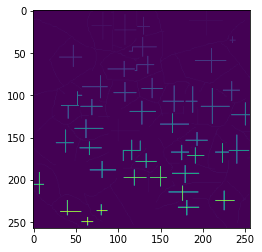

In [6]:
# connected component decomposition used for labeling cell markers
labels_objm = label(cell_objectMask, connectivity=2)

# creating markers for RW 
markers = labels_objm + cell_backgroundMask
plt.imshow(markers)

In [7]:
# RW segmentation on 2D image
labels = random_walker(cell_imageArray, markers, beta=5000, mode='bf')

(-0.5, 255.5, 256.5, -0.5)

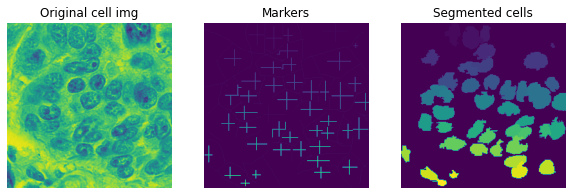

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))
ax1.set_title('Original cell img')
ax1.imshow(cell_imageArray)
ax1.axis('off')

ax2.set_title('Markers')
ax2.imshow(markers)
ax2.axis('off')

ax3.set_title('Segmented cells')
ax3.imshow(labels)
ax3.axis('off')

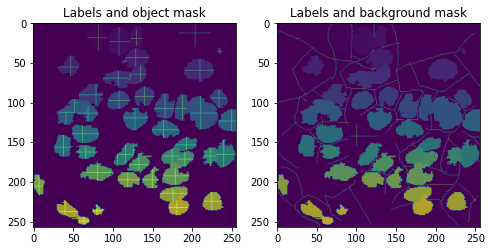

In [27]:
# visualization for cell markers and borders for segmented image

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

ax1.set_title('Labels and object mask')
ax1.imshow(labels)
ax1.imshow(cell_objectMask, alpha=0.3)

ax2.set_title('Labels and background mask')
ax2.imshow(labels)
ax2.imshow(cell_backgroundMask, alpha=0.3)

# Random walker in 3D

In [29]:
# creating markers
han_mask = label(HaN_objectMask, connectivity=2)
han_markers = han_mask + HaN_backgroundMask

In [ ]:
# function for segmentation of 3D arrays
labels = random_walker(HaN_imageArray, han_markers, beta=10000, mode='cg_mg')

(-0.5, 140.5, 144.5, -0.5)

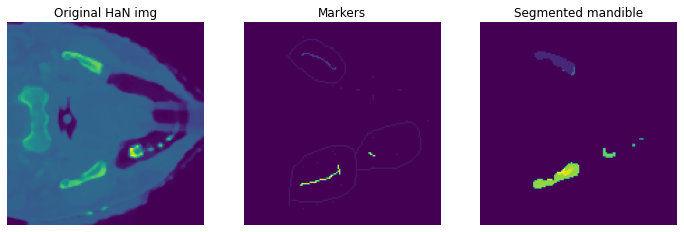

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))

ax1.set_title('Original HaN img')
ax1.imshow(HaN_imageArray[:, :, 47])
ax1.axis('off')

ax2.set_title('Markers')
ax2.imshow(han_markers[:, :, 47])
ax2.axis('off')

ax3.set_title('Segmented mandible')
ax3.imshow(labels[:, :, 47])
ax3.axis('off')


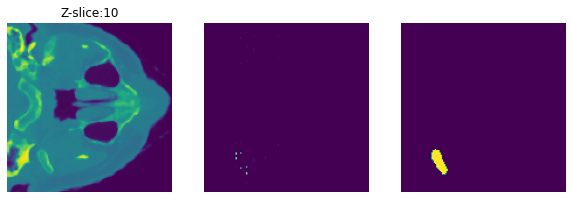

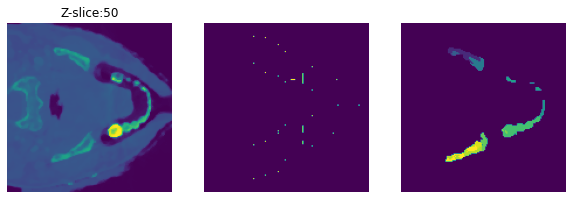

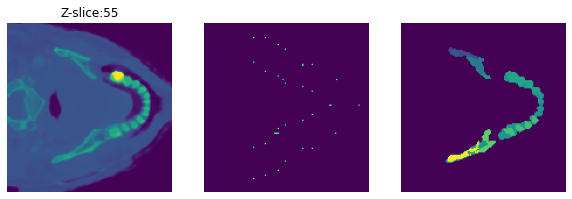

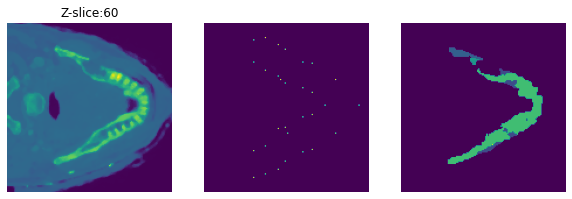

In [33]:
# visualization of different z-slices

z_slices = [10,50,55,60]

for value in z_slices:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))

    ax1.imshow(HaN_imageArray[:, :, value])
    ax1.axis('off')
    ax1.set_title(f'Z-slice:{value}')
    ax2.imshow(han_markers[:, :, value])
    ax2.axis('off')
    ax3.imshow(labels[:, :, value])
    ax3.axis('off')